In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Procurement KPI Analysis Dataset.csv')
df

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No
...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes
773,PO-00774,Alpha_Inc,2022-07-23,NaN,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes


In [4]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [5]:
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'],errors='coerce')

In [6]:
def dilver_date(row):
    if pd.isna(row['Delivery_Date']):
        return row['Order_Date']
    else :
        return row['Delivery_Date']


df['Delivery_Date'] = df.apply(dilver_date,axis=1)

<Axes: xlabel='Item_Category'>

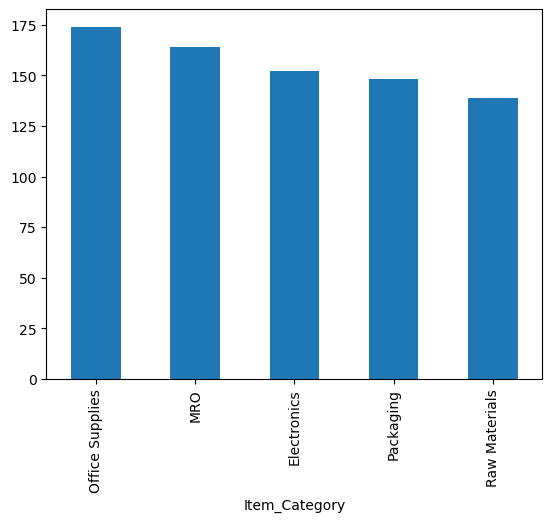

In [7]:
df['Item_Category'].value_counts().plot(kind='bar')

In [8]:
df['Supplier'].value_counts()

Supplier
Delta_Logistics    171
Epsilon_Group      166
Beta_Supplies      156
Gamma_Co           143
Alpha_Inc          141
Name: count, dtype: int64

<Axes: xlabel='Order_Status'>

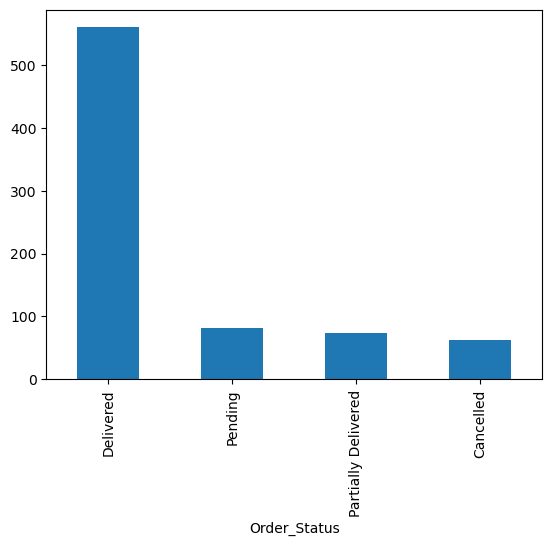

In [9]:
df['Order_Status'].value_counts().plot(kind='bar')

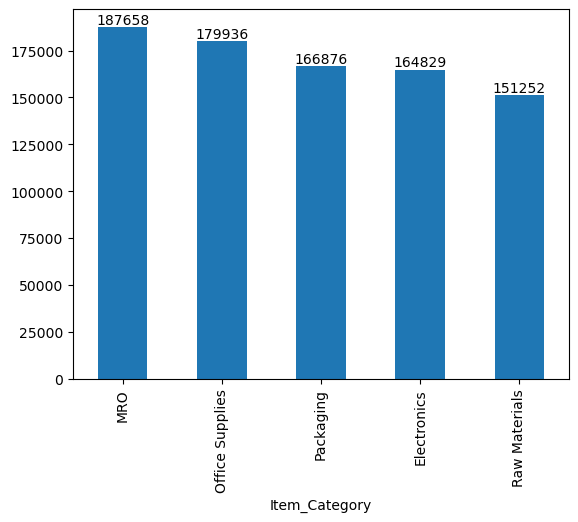

In [10]:
Quan_ittem_cat =df.groupby('Item_Category')['Quantity'].sum().sort_values(ascending=False)
ax = Quan_ittem_cat.plot(kind='bar')
for ind in ax.containers:
    ax.bar_label(ind)

In [11]:
df.insert(8,'total_price_before_negotiated',df['Quantity'] * df['Unit_Price'])

In [12]:
df.insert(10,'total_price_after_negotiated',df['Negotiated_Price']* df['Quantity'])

In [13]:
df['Defective_Units']=df['Defective_Units'].fillna(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   PO_ID                          777 non-null    object        
 1   Supplier                       777 non-null    object        
 2   Order_Date                     777 non-null    datetime64[ns]
 3   Delivery_Date                  777 non-null    datetime64[ns]
 4   Item_Category                  777 non-null    object        
 5   Order_Status                   777 non-null    object        
 6   Quantity                       777 non-null    int64         
 7   Unit_Price                     777 non-null    float64       
 8   total_price_before_negotiated  777 non-null    float64       
 9   Negotiated_Price               777 non-null    float64       
 10  total_price_after_negotiated   777 non-null    float64       
 11  Defective_Units    

In [15]:
df['Number of waiting days'] = (df['Delivery_Date'] - df['Order_Date']).dt.days

In [16]:
def error_dilver(row):
    if  pd.to_datetime(row['Delivery_Date'])< pd.to_datetime(row['Order_Date']):
        return pd.to_datetime(row['Delivery_Date']) + pd.Timedelta(weeks=1)
    else :
        return row['Delivery_Date']

df['Delivery_Date']=df.apply(error_dilver,axis=1)

In [17]:
df['Number of waiting days'].value_counts()

Number of waiting days
 0     87
 19    42
 15    41
 12    40
 13    40
 6     39
 11    39
 18    37
 16    37
 3     37
 8     36
 4     35
 14    33
 2     33
 10    32
 20    32
 5     32
 17    29
 7     28
 1     24
 9     23
-5      1
Name: count, dtype: int64

In [18]:
df.groupby('Order_Status')['total_price_after_negotiated'].mean()

Order_Status
Cancelled              56991.986032
Delivered              57872.612179
Partially Delivered    55729.262192
Pending                65509.905062
Name: total_price_after_negotiated, dtype: float64

In [19]:
df.groupby('Order_Status')['Quantity'].sum().sort_values(ascending=False)

Order_Status
Delivered              614078
Pending                 92420
Partially Delivered     78617
Cancelled               65436
Name: Quantity, dtype: int64

In [20]:
count_of_orders = df.groupby(['Supplier','Order_Status'])['Order_Status'].count().unstack()
count_of_orders

Order_Status,Cancelled,Delivered,Partially Delivered,Pending
Supplier,,,,
Alpha_Inc,13,107,10,11
Beta_Supplies,14,110,13,19
Delta_Logistics,16,120,18,17
Epsilon_Group,14,120,14,18
Gamma_Co,6,103,18,16


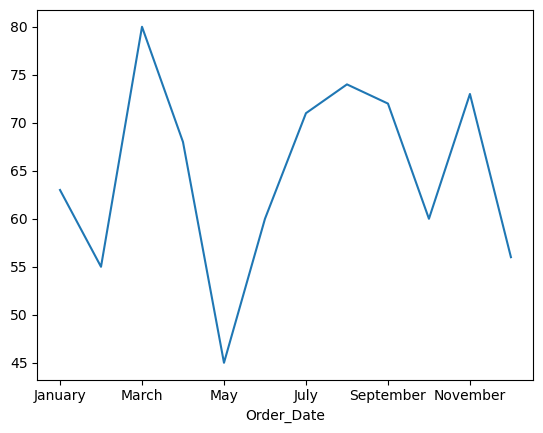

In [21]:
max_month_order = df['Order_Date'].dt.month_name().value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
max_month_order = max_month_order.reindex(month_order)
ax=max_month_order.plot(kind='line')

In [22]:
df

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,total_price_before_negotiated,Negotiated_Price,total_price_after_negotiated,Defective_Units,Compliance,Number of waiting days
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,23672.88,17.81,20944.56,0.0,Yes,8
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,59333.88,37.34,56346.06,235.0,Yes,10
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,86914.10,92.26,83956.60,41.0,Yes,20
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,134198.40,95.52,128378.88,112.0,Yes,19
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,75602.60,60.53,71425.40,171.0,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,73162.70,42.24,71174.40,262.0,Yes,9
773,PO-00774,Alpha_Inc,2022-07-23,2022-07-23,Office Supplies,Delivered,445,68.94,30678.30,60.35,26855.75,7.0,Yes,0
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,46841.08,81.89,40453.66,29.0,Yes,19
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,27491.30,18.27,23860.62,128.0,Yes,12


In [44]:
order_diliver = df.loc[df['Order_Status']=='Delivered']
order_diliver

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,total_price_before_negotiated,Negotiated_Price,total_price_after_negotiated,Defective_Units,Compliance,Number of waiting days
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,59333.88,37.34,56346.06,235.0,Yes,10
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,86914.10,92.26,83956.60,41.0,Yes,20
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,134198.40,95.52,128378.88,112.0,Yes,19
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,75602.60,60.53,71425.40,171.0,No,12
5,PO-00006,Epsilon_Group,2022-08-17,2022-08-29,MRO,Delivered,1145,69.21,79245.45,63.57,72787.65,39.0,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,73162.70,42.24,71174.40,262.0,Yes,9
773,PO-00774,Alpha_Inc,2022-07-23,2022-07-23,Office Supplies,Delivered,445,68.94,30678.30,60.35,26855.75,7.0,Yes,0
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,46841.08,81.89,40453.66,29.0,Yes,19
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,27491.30,18.27,23860.62,128.0,Yes,12


In [58]:
tot_price = order_diliver.groupby('Order_Date')[['total_price_before_negotiated','total_price_after_negotiated']].mean()
tot_price

,total_price_before_negotiated,total_price_after_negotiated
Order_Date,,
2022-01-01,25081.06,23827.42
2022-01-02,1915.90,1757.80
2022-01-03,10940.92,9618.24
2022-01-04,43812.24,41140.26
2022-01-06,56265.51,50394.75
...,...,...
2023-12-24,13258.08,12973.50
2023-12-25,26620.84,25460.40
2023-12-26,67204.62,57774.02


In [89]:
df['Year'] = df['Order_Date'].dt.year
df['Year'].unique()

array([2023, 2022, 2024])

In [81]:
df.to_excel('Procurement KPI Analysis Dataset.xlsx',index=False)